In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta

In [2]:
#df=pd.read_csv('RELIANCE.NS (1).csv')
df=pd.read_csv('TCS.NS.csv')


df[df['Open'].isnull()==True]


df=df.dropna()


In [3]:
df2=pd.read_csv('^NSEI.csv')

In [4]:
df2=df2[['Date','Close','Open','High','Low']]

In [5]:
df2.columns=['Date', 'Market_Close','Market_Open','Market_High','Market_Low']

In [6]:
df2.head()

,Date,Market_Close,Market_Open,Market_High,Market_Low
0,2010-01-18,5274.850098,5253.649902,5292.500000,5228.950195
1,2010-01-19,5225.649902,5274.200195,5287.799805,5218.649902
2,2010-01-20,5221.700195,5226.100098,5256.700195,5201.399902
3,2010-01-21,5094.149902,5220.200195,5220.350098,5085.450195
4,2010-01-22,5036.000000,5094.149902,5094.149902,4954.850098


In [7]:
df=pd.merge(df,df2,on=['Date'])

In [8]:
df=df.dropna()

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Market_Close,Market_Open,Market_High,Market_Low
0,2010-01-18,400.000000,414.500000,396.500000,401.100006,319.906921,7261084.0,5274.850098,5253.649902,5292.500000,5228.950195
1,2010-01-19,401.100006,401.100006,389.325012,390.350006,311.332947,5154850.0,5225.649902,5274.200195,5287.799805,5218.649902
2,2010-01-20,396.100006,396.100006,385.450012,389.700012,310.814484,4347054.0,5221.700195,5226.100098,5256.700195,5201.399902
3,2010-01-21,386.125000,395.975006,383.950012,385.325012,307.325073,5089504.0,5094.149902,5220.200195,5220.350098,5085.450195
4,2010-01-22,380.500000,382.500000,372.350006,378.924988,302.220673,7574990.0,5036.000000,5094.149902,5094.149902,4954.850098


In [10]:
def cleansort(data):
   
    data['Date']=pd.to_datetime(data['Date'])
    data=data.sort_values(by='Date')
    data.set_index(pd.DatetimeIndex(data['Date']), inplace=True)
    try:
        data=data.drop(['Date'],axis=1)
    except:
        pass
    
    
    return data

def tech_indicators(data):
    data.ta.rsi(close='Close', length=5, append=True)
    data.ta.ema(close='Close', length=5, append=True)
    
    data=data[6:]
    #data.ta.cdl_pattern(name="all",append=True)
    #data.ta.strategy("momentum")
    return data

def datashift(data):
    
    col=data.columns
    
    ### ltp== last traded price
    ### vwap= volume weighted average price
    data=data.reset_index(drop=True)
    for j in col:
        x=[]
        for i in range(len(data)):
            if (i==0):
                x.append(0)
            else:
                x.append(data[j][i-1])
        nam='prev_'+j
        data[nam]=x
    data['openingprice_diff']=data['Open']-data['prev_Open']
    data['prev_h_l_diff']=data['prev_High']-data['prev_Low']
    data['open_close_diff']=data['prev_Open']-data['prev_Close']
    
    data['marketopeningprice_diff']=data['Market_Open']-data['prev_Market_Open']
    data['marketprev_h_l_diff']=data['prev_Market_High']-data['prev_Market_Low']
    data['marketopen_close_diff']=data['prev_Market_Open']-data['prev_Market_Close']
    col= [e for e in col if e not in ('Close')]
    data=data.drop(col,axis=1)
    data=data[1:]
    data=data.reset_index(drop=True)
    #data=data.drop(['PREV. CLOSE '],axis=1)
    return data




def xy(data):
    X=data.drop('Close',axis=1)
    y=data['Close']
    return X,y

In [120]:
a=cleansort(df.copy())
b=tech_indicators(a)
c=datashift(b)
'''c=c.drop([ 'prev_Open', 'prev_High', 'prev_Low', 'prev_Close',
       'prev_Adj Close', 'prev_Market_Close',
       'prev_Market_Open', 'prev_Market_High', 'prev_Market_Low'
       ],axis=1)'''
X,y=xy(c)

In [121]:
c.tail()

,Close,prev_Open,prev_High,prev_Low,prev_Close,prev_Adj Close,prev_Volume,prev_Market_Close,prev_Market_Open,prev_Market_High,prev_Market_Low,prev_RSI_5,prev_EMA_5,openingprice_diff,prev_h_l_diff,open_close_diff,marketopeningprice_diff,marketprev_h_l_diff,marketopen_close_diff
2928,3879.850098,3820.0,3864.899902,3796.399902,3853.500000,3853.500000,2460591.0,17812.699219,17797.599609,17905.000000,17704.550781,68.573361,3826.447545,158.000000,68.500000,-33.500000,115.701172,200.449219,-15.099610
2929,3915.899902,3978.0,3978.000000,3861.000000,3879.850098,3879.850098,3937092.0,18003.300781,17913.300781,18017.449219,17879.150391,72.941935,3844.248396,-122.000000,117.000000,98.149902,84.449219,138.298828,-90.000000
2930,3859.899902,3856.0,3925.000000,3856.000000,3915.899902,3915.899902,1906106.0,18055.750000,17997.750000,18081.250000,17964.400391,78.138848,3868.132231,69.000000,69.000000,-59.899902,172.650391,116.849609,-58.000000
2931,3897.899902,3925.0,3929.000000,3836.550049,3859.899902,3859.899902,3203744.0,18212.349609,18170.400391,18227.949219,18128.800781,56.913346,3865.388122,-7.000000,92.449951,65.100098,86.599609,99.148438,-41.949218
2932,3968.149902,3918.0,3923.000000,3857.000000,3897.899902,3897.899902,6684507.0,18257.800781,18257.000000,18272.250000,18163.800781,64.981800,3876.225382,-40.149902,66.000000,20.100098,-72.000000,108.449219,-0.800781


In [122]:
c.columns

Index(['Close', 'prev_Open', 'prev_High', 'prev_Low', 'prev_Close',
       'prev_Adj Close', 'prev_Volume', 'prev_Market_Close',
       'prev_Market_Open', 'prev_Market_High', 'prev_Market_Low', 'prev_RSI_5',
       'prev_EMA_5', 'openingprice_diff', 'prev_h_l_diff', 'open_close_diff',
       'marketopeningprice_diff', 'marketprev_h_l_diff',
       'marketopen_close_diff'],
      dtype='object')

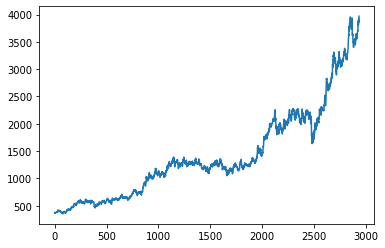

In [123]:
plt.plot(range(len(y)),y)

In [124]:
X

,prev_Open,prev_High,prev_Low,prev_Close,prev_Adj Close,prev_Volume,prev_Market_Close,prev_Market_Open,prev_Market_High,prev_Market_Low,prev_RSI_5,prev_EMA_5,openingprice_diff,prev_h_l_diff,open_close_diff,marketopeningprice_diff,marketprev_h_l_diff,marketopen_close_diff
0,375.000000,379.850006,370.075012,371.649994,297.204315,4844398.0,4853.100098,5008.500000,5008.500000,4833.049805,0.000000,380.830001,-0.250000,9.774994,3.350006,-145.500000,175.450195,155.399902
1,374.750000,378.975006,363.850006,370.875000,296.584534,6537196.0,4867.250000,4863.000000,4929.899902,4824.950195,0.000000,377.511668,-7.750000,15.125000,3.875000,3.149902,104.949707,-4.250000
2,367.000000,369.899994,356.075012,368.100006,294.365387,5473326.0,4882.049805,4866.149902,4893.700195,4766.000000,0.000000,374.374447,0.174988,13.824982,-1.100006,15.899903,127.700195,-15.899903
3,367.174988,381.399994,360.000000,373.075012,298.343903,3378012.0,4899.700195,4882.049805,4918.799805,4827.149902,24.370316,373.941302,10.325012,21.399994,-5.900024,25.800293,91.649903,-17.650390
4,377.500000,381.325012,367.500000,369.200012,295.245087,4739188.0,4830.100098,4907.850098,4951.149902,4814.100098,19.696790,372.360872,-5.500000,13.825012,8.299988,-76.850098,137.049804,77.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,3820.000000,3864.899902,3796.399902,3853.500000,3853.500000,2460591.0,17812.699219,17797.599609,17905.000000,17704.550781,68.573361,3826.447545,158.000000,68.500000,-33.500000,115.701172,200.449219,-15.099610
2929,3978.000000,3978.000000,3861.000000,3879.850098,3879.850098,3937092.0,18003.300781,17913.300781,18017.449219,17879.150391,72.941935,3844.248396,-122.000000,117.000000,98.149902,84.449219,138.298828,-90.000000
2930,3856.000000,3925.000000,3856.000000,3915.899902,3915.899902,1906106.0,18055.750000,17997.750000,18081.250000,17964.400391,78.138848,3868.132231,69.000000,69.000000,-59.899902,172.650391,116.849609,-58.000000
2931,3925.000000,3929.000000,3836.550049,3859.899902,3859.899902,3203744.0,18212.349609,18170.400391,18227.949219,18128.800781,56.913346,3865.388122,-7.000000,92.449951,65.100098,86.599609,99.148438,-41.949218


In [125]:
y

0        370.875000
1        368.100006
2        373.075012
3        369.200012
4        376.475006
           ...     
2928    3879.850098
2929    3915.899902
2930    3859.899902
2931    3897.899902
2932    3968.149902
Name: Close, Length: 2933, dtype: float64

In [126]:
ltsm_data=y.copy()

In [127]:
len(X)

2933

In [128]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
#scale=StandardScaler()
scale=MinMaxScaler(feature_range = (0, 1))

X_train, X_test, y_train, y_test = X.iloc[:2700],X.iloc[2700:],y[:2700],y[2700:]

X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [129]:
lstm_train=y_train.copy()

In [130]:
lstm_test=y_test.copy()

In [131]:
# from sklearn.svm import SVR



# from sklearn.linear_model import LinearRegression

# # Create Regression Model

# model = LinearRegression()
# # Train the model
# model.fit(X_train, y_train)

# # Use model to make predictions
# y_pred = model.predict(X_test)


# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# # Printout relevant metrics
# print("Model Coefficients:", model.coef_)
# print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# print("Coefficient of Determination:", r2_score(y_test, y_pred))

# from sklearn.svm import SVR


# X=scale.fit_transform(X)
# from sklearn.linear_model import LinearRegression

# # Create Regression Model

# model = LinearRegression()
# # Train the model
# model.fit(X, y)

# # Use model to make predictions
# y_pred = model.predict(X)


# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# # Printout relevant metrics
# print("Model Coefficients:", model.coef_)
# print("Mean Absolute Error:", mean_absolute_error(y, y_pred))
# print("Coefficient of Determination:", r2_score(y, y_pred))


Model Coefficients: [1332.57689304  -26.4349546   -26.00567868 1318.77904727   68.76424097
    2.07380428 -109.17391949 -104.97497236  111.32278187  110.80719286
    5.11428952  274.48953585  322.93428748   -8.02979272  117.36666064
   18.44778771   10.84210477   42.89881553]
Mean Absolute Error: 30.92364140252076
Coefficient of Determination: 0.9785258272666656


In [132]:
# import pickle
# filename = 'tcs-intraday.pklsav'
# pickle.dump(model, open(filename, 'wb'))

In [133]:
import pickle
filename = 'tcs-intraday.pklsav'

In [134]:
X_test.shape

(233, 18)

In [135]:
model = pickle.load(open(filename, 'rb'))

In [136]:
y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [1332.57689304  -26.4349546   -26.00567868 1318.77904727   68.76424097
    2.07380428 -109.17391949 -104.97497236  111.32278187  110.80719286
    5.11428952  274.48953585  322.93428748   -8.02979272  117.36666064
   18.44778771   10.84210477   42.89881553]
Mean Absolute Error: 30.92364140252076
Coefficient of Determination: 0.9785258272666656


In [137]:
X.columns

Index(['prev_Open', 'prev_High', 'prev_Low', 'prev_Close', 'prev_Adj Close',
       'prev_Volume', 'prev_Market_Close', 'prev_Market_Open',
       'prev_Market_High', 'prev_Market_Low', 'prev_RSI_5', 'prev_EMA_5',
       'openingprice_diff', 'prev_h_l_diff', 'open_close_diff',
       'marketopeningprice_diff', 'marketprev_h_l_diff',
       'marketopen_close_diff'],
      dtype='object')

In [138]:
ans=pd.DataFrame(scale.inverse_transform(X_test),columns=X.columns)
ans.reset_index(inplace=True)



ans['actual_close']=y_test.values

ans['pred_close']=y_pred

In [139]:
ans

,index,prev_Open,prev_High,prev_Low,prev_Close,prev_Adj Close,prev_Volume,prev_Market_Close,prev_Market_Open,prev_Market_High,...,prev_RSI_5,prev_EMA_5,openingprice_diff,prev_h_l_diff,open_close_diff,marketopeningprice_diff,marketprev_h_l_diff,marketopen_close_diff,actual_close,pred_close
0,0,3198.949951,3205.850098,3129.000000,3157.949951,3129.729492,2366135.0,14924.250000,14952.599609,15014.650391,...,37.954062,3180.066550,-9.449951,76.850098,41.000000,111.700196,149.900391,28.349609,3214.100098,3185.300348
1,1,3189.500000,3226.000000,3155.149902,3214.100098,3185.377930,2526592.0,15115.799805,15064.299805,15159.900391,...,56.555759,3191.411066,5.500000,70.850098,-24.600098,99.850586,118.850586,-51.500000,3176.899902,3194.813305
2,2,3195.000000,3245.800049,3164.000000,3176.899902,3148.510010,2658751.0,15109.299805,15164.150391,15257.099609,...,45.306912,3186.574011,-10.000000,81.800049,18.100098,-45.100586,192.799804,54.850586,3213.300049,3183.337581
3,3,3185.000000,3219.399902,3157.300049,3213.300049,3184.584717,2127983.0,15106.500000,15119.049805,15168.250000,...,56.008889,3195.482690,30.000000,62.099853,-28.300049,-45.799805,191.049805,12.549805,3206.000000,3213.617567
4,4,3215.000000,3219.300049,3185.050049,3206.000000,3177.350098,1165882.0,15173.299805,15073.250000,15188.500000,...,53.389959,3198.988460,-30.800049,34.250000,9.000000,112.950195,123.099609,-100.049805,3190.800049,3182.545583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,3820.000000,3864.899902,3796.399902,3853.500000,3853.500000,2460591.0,17812.699219,17797.599609,17905.000000,...,68.573361,3826.447545,158.000000,68.500000,-33.500000,115.701172,200.449219,-15.099610,3879.850098,3967.091439
229,229,3978.000000,3978.000000,3861.000000,3879.850098,3879.850098,3937092.0,18003.300781,17913.300781,18017.449219,...,72.941935,3844.248396,-122.000000,117.000000,98.149902,84.449219,138.298828,-90.000000,3915.899902,3844.090945
230,230,3856.000000,3925.000000,3856.000000,3915.899902,3915.899902,1906106.0,18055.750000,17997.750000,18081.250000,...,78.138848,3868.132231,69.000000,69.000000,-59.899902,172.650391,116.849609,-58.000000,3859.899902,3923.772028
231,231,3925.000000,3929.000000,3836.550049,3859.899902,3859.899902,3203744.0,18212.349609,18170.400391,18227.949219,...,56.913346,3865.388122,-7.000000,92.449951,65.100098,86.599609,99.148438,-41.949218,3897.899902,3905.970589


In [30]:
day=30

In [31]:
train=ltsm_data.values[:2700]
test=ltsm_data.values[2700-day:]

In [32]:
sc = MinMaxScaler(feature_range = (0, 1))
#sc=StandardScaler()
dataset=ltsm_data.values
#scaled_data= sc.fit_transform(np.reshape(dataset,(len(dataset),1)))
scaled_train= sc.fit_transform(np.reshape(train,(len(train),1)))
scaled_test= sc.transform(np.reshape(test,(len(test),1)))


In [33]:
# Feature Scaling


# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(day,2700):
    X_train.append(scaled_train[i-day:i, 0])
    y_train.append(scaled_train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
X_train.shape

(2670, 30, 1)

In [35]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
'''model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = day, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.15))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = day, return_sequences = True))
model.add(Dropout(0.15))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = day, return_sequences = True))
model.add(Dropout(0.15))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = day))


# Adding the output layer
model.add(Dense(units = 1))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
#model.load_weights('saved-model-weights/my_model.hdf5')
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size =32,callbacks=[callback])'''

"model = Sequential()\n#Adding the first LSTM layer and some Dropout regularisation\nmodel.add(LSTM(units = day, return_sequences = True, input_shape = (X_train.shape[1], 1)))\nmodel.add(Dropout(0.15))\n# Adding a second LSTM layer and some Dropout regularisation\nmodel.add(LSTM(units = day, return_sequences = True))\nmodel.add(Dropout(0.15))\n# Adding a third LSTM layer and some Dropout regularisation\nmodel.add(LSTM(units = day, return_sequences = True))\nmodel.add(Dropout(0.15))\n# Adding a fourth LSTM layer and some Dropout regularisation\nmodel.add(LSTM(units = day))\n\n\n# Adding the output layer\nmodel.add(Dense(units = 1))\ncallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)\n#model.load_weights('saved-model-weights/my_model.hdf5')\n# Compiling the RNN\nmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')\n\n# Fitting the RNN to the Training set\nmodel.fit(X_train, y_train, epochs = 100, batch_size =32,callbacks=[callback])"

In [37]:
#model.save('myfinal_model/')

In [38]:
import tensorflow as tf

In [39]:
#model = tf.keras.models.load_model('myfinal_model/')

In [40]:
file=open('./jsonmodel.json','r')
json_model=file.read()
file.close()
model=tf.keras.models.model_from_json(json_model)
model.load_weights('./json_weigts.h5')

In [41]:
test_data=scaled_test

In [42]:
X_test=[]
y_test=dataset[2700:]
for i in range(day,len(test_data)):
    X_test.append(test_data[i-day:i, 0])



X_test = np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape

predictions=model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [43]:
predictions=sc.inverse_transform(predictions)

In [44]:
predictions.shape

(233, 1)

In [45]:
predictions.shape

(233, 1)

In [46]:
predictions

array([[3210.5117],
       [3224.6   ],
       [3232.6301],
       [3239.2556],
       [3244.2417],
       [3244.518 ],
       [3232.7627],
       [3208.6074],
       [3175.7993],
       [3142.1162],
       [3118.0815],
       [3090.3806],
       [3063.815 ],
       [3039.9426],
       [3029.1223],
       [3016.9248],
       [3005.1194],
       [3008.511 ],
       [3033.509 ],
       [3067.5916],
       [3090.2593],
       [3095.2627],
       [3093.5618],
       [3094.2488],
       [3096.2517],
       [3098.718 ],
       [3107.0728],
       [3119.6794],
       [3120.2527],
       [3110.312 ],
       [3108.754 ],
       [3120.7346],
       [3136.6943],
       [3140.4011],
       [3131.7483],
       [3131.7158],
       [3146.9045],
       [3168.172 ],
       [3197.8047],
       [3232.5652],
       [3264.2122],
       [3293.1865],
       [3316.3098],
       [3318.358 ],
       [3280.4846],
       [3238.2898],
       [3208.5698],
       [3190.929 ],
       [3180.7358],
       [3172.1145],


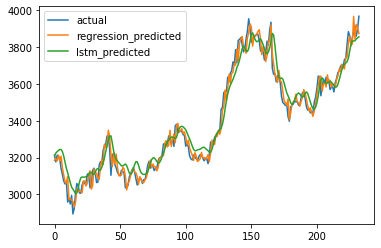

In [47]:
plt.plot(ans['actual_close'],label='actual')
plt.plot(ans['pred_close'],label='regression_predicted')
plt.plot(predictions,label='lstm_predicted')
plt.legend()

In [48]:
ans['lstm_pred']=predictions

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 20)               

In [50]:
X_test=[]
y_test=dataset[2700:]
for i in range(day,len(test_data)):
    X_test.append(test_data[i-day:i, 0])



X_test = np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

predictions=model.predict(X_test)
predictions=sc.inverse_transform(predictions)

(233, 30, 1)


In [51]:
predictions

array([[3210.5117],
       [3224.6   ],
       [3232.6301],
       [3239.2556],
       [3244.2417],
       [3244.518 ],
       [3232.7627],
       [3208.6074],
       [3175.7993],
       [3142.1162],
       [3118.0815],
       [3090.3806],
       [3063.815 ],
       [3039.9426],
       [3029.1223],
       [3016.9248],
       [3005.1194],
       [3008.511 ],
       [3033.509 ],
       [3067.5916],
       [3090.2593],
       [3095.2627],
       [3093.5618],
       [3094.2488],
       [3096.2517],
       [3098.718 ],
       [3107.0728],
       [3119.6794],
       [3120.2527],
       [3110.312 ],
       [3108.754 ],
       [3120.7346],
       [3136.6943],
       [3140.4011],
       [3131.7483],
       [3131.7158],
       [3146.9045],
       [3168.172 ],
       [3197.8047],
       [3232.5652],
       [3264.2122],
       [3293.1865],
       [3316.3098],
       [3318.358 ],
       [3280.4846],
       [3238.2898],
       [3208.5698],
       [3190.929 ],
       [3180.7358],
       [3172.1145],


In [52]:
ans

,index,prev_Open,prev_High,prev_Low,prev_Close,prev_Adj Close,prev_Volume,prev_Market_Close,prev_Market_Open,prev_Market_High,...,prev_EMA_5,openingprice_diff,prev_h_l_diff,open_close_diff,marketopeningprice_diff,marketprev_h_l_diff,marketopen_close_diff,actual_close,pred_close,lstm_pred
0,0,3198.949951,3205.850098,3129.000000,3157.949951,3129.729492,2366135.0,14924.250000,14952.599609,15014.650391,...,3180.066550,-9.449951,76.850098,41.000000,111.700196,149.900391,28.349609,3214.100098,3185.300348,3210.511719
1,1,3189.500000,3226.000000,3155.149902,3214.100098,3185.377930,2526592.0,15115.799805,15064.299805,15159.900391,...,3191.411066,5.500000,70.850098,-24.600098,99.850586,118.850586,-51.500000,3176.899902,3194.813305,3224.600098
2,2,3195.000000,3245.800049,3164.000000,3176.899902,3148.510010,2658751.0,15109.299805,15164.150391,15257.099609,...,3186.574011,-10.000000,81.800049,18.100098,-45.100586,192.799804,54.850586,3213.300049,3183.337581,3232.630127
3,3,3185.000000,3219.399902,3157.300049,3213.300049,3184.584717,2127983.0,15106.500000,15119.049805,15168.250000,...,3195.482690,30.000000,62.099853,-28.300049,-45.799805,191.049805,12.549805,3206.000000,3213.617567,3239.255615
4,4,3215.000000,3219.300049,3185.050049,3206.000000,3177.350098,1165882.0,15173.299805,15073.250000,15188.500000,...,3198.988460,-30.800049,34.250000,9.000000,112.950195,123.099609,-100.049805,3190.800049,3182.545583,3244.241699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,3820.000000,3864.899902,3796.399902,3853.500000,3853.500000,2460591.0,17812.699219,17797.599609,17905.000000,...,3826.447545,158.000000,68.500000,-33.500000,115.701172,200.449219,-15.099610,3879.850098,3967.091439,3833.915527
229,229,3978.000000,3978.000000,3861.000000,3879.850098,3879.850098,3937092.0,18003.300781,17913.300781,18017.449219,...,3844.248396,-122.000000,117.000000,98.149902,84.449219,138.298828,-90.000000,3915.899902,3844.090945,3834.594971
230,230,3856.000000,3925.000000,3856.000000,3915.899902,3915.899902,1906106.0,18055.750000,17997.750000,18081.250000,...,3868.132231,69.000000,69.000000,-59.899902,172.650391,116.849609,-58.000000,3859.899902,3923.772028,3845.101807
231,231,3925.000000,3929.000000,3836.550049,3859.899902,3859.899902,3203744.0,18212.349609,18170.400391,18227.949219,...,3865.388122,-7.000000,92.449951,65.100098,86.599609,99.148438,-41.949218,3897.899902,3905.970589,3850.989014


In [53]:
def buysell(data):
    act=[]
    for i in range(len(data)):
        
        if (data['actual_close'][i] > data['prev_Close'][i]):
            act.append(1)
        else:
            act.append(0)

    data['action']=act
    act=[]
    for i in range(len(data)):
        
        if (data['pred_close'][i] > data['prev_Close'][i]):
            act.append(1)
        else:
            act.append(0)

    data['action_pred']=act
    
    #data=data.drop('Close',axis=1)
    return data

In [54]:
buysell(ans)

,index,prev_Open,prev_High,prev_Low,prev_Close,prev_Adj Close,prev_Volume,prev_Market_Close,prev_Market_Open,prev_Market_High,...,prev_h_l_diff,open_close_diff,marketopeningprice_diff,marketprev_h_l_diff,marketopen_close_diff,actual_close,pred_close,lstm_pred,action,action_pred
0,0,3198.949951,3205.850098,3129.000000,3157.949951,3129.729492,2366135.0,14924.250000,14952.599609,15014.650391,...,76.850098,41.000000,111.700196,149.900391,28.349609,3214.100098,3185.300348,3210.511719,1,1
1,1,3189.500000,3226.000000,3155.149902,3214.100098,3185.377930,2526592.0,15115.799805,15064.299805,15159.900391,...,70.850098,-24.600098,99.850586,118.850586,-51.500000,3176.899902,3194.813305,3224.600098,0,0
2,2,3195.000000,3245.800049,3164.000000,3176.899902,3148.510010,2658751.0,15109.299805,15164.150391,15257.099609,...,81.800049,18.100098,-45.100586,192.799804,54.850586,3213.300049,3183.337581,3232.630127,1,1
3,3,3185.000000,3219.399902,3157.300049,3213.300049,3184.584717,2127983.0,15106.500000,15119.049805,15168.250000,...,62.099853,-28.300049,-45.799805,191.049805,12.549805,3206.000000,3213.617567,3239.255615,0,1
4,4,3215.000000,3219.300049,3185.050049,3206.000000,3177.350098,1165882.0,15173.299805,15073.250000,15188.500000,...,34.250000,9.000000,112.950195,123.099609,-100.049805,3190.800049,3182.545583,3244.241699,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,3820.000000,3864.899902,3796.399902,3853.500000,3853.500000,2460591.0,17812.699219,17797.599609,17905.000000,...,68.500000,-33.500000,115.701172,200.449219,-15.099610,3879.850098,3967.091439,3833.915527,1,1
229,229,3978.000000,3978.000000,3861.000000,3879.850098,3879.850098,3937092.0,18003.300781,17913.300781,18017.449219,...,117.000000,98.149902,84.449219,138.298828,-90.000000,3915.899902,3844.090945,3834.594971,1,0
230,230,3856.000000,3925.000000,3856.000000,3915.899902,3915.899902,1906106.0,18055.750000,17997.750000,18081.250000,...,69.000000,-59.899902,172.650391,116.849609,-58.000000,3859.899902,3923.772028,3845.101807,0,1
231,231,3925.000000,3929.000000,3836.550049,3859.899902,3859.899902,3203744.0,18212.349609,18170.400391,18227.949219,...,92.449951,65.100098,86.599609,99.148438,-41.949218,3897.899902,3905.970589,3850.989014,1,1


In [55]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
accuracy_score(ans['action'][:100],ans['action_pred'][:100])

0.63

## Predicting future

In [57]:
X_test.shape

(233, 30, 1)

In [58]:
test_data.shape

(263, 1)

In [59]:
len(test_data[test_data.shape[0]-day:, 0])

30

In [60]:
X_test.shape[1]

30

In [61]:
np.reshape(test_data[test_data.shape[0]-day:, 0],(1,X_test.shape[1], 1))

array([[[1.07691718],
        [1.09317256],
        [1.10750157],
        [1.09900219],
        [1.11084732],
        [1.10167195],
        [1.10645398],
        [1.08839062],
        [1.09219254],
        [1.0931219 ],
        [1.08384513],
        [1.10121577],
        [1.10880271],
        [1.11960017],
        [1.12237134],
        [1.13088772],
        [1.13441927],
        [1.13041454],
        [1.14361147],
        [1.14516607],
        [1.1719992 ],
        [1.1946418 ],
        [1.18659859],
        [1.16851831],
        [1.18408089],
        [1.19298588],
        [1.20516888],
        [1.18624373],
        [1.19908579],
        [1.22282672]]])

In [62]:
fut_data=test_data[-30:,:]

In [63]:
sc.inverse_transform(np.array(fut_data).reshape(-1,1))

array([[3536.399902],
       [3584.5     ],
       [3626.899902],
       [3601.75    ],
       [3636.800049],
       [3609.649902],
       [3623.800049],
       [3570.350098],
       [3581.600098],
       [3584.350098],
       [3556.899902],
       [3608.300049],
       [3630.75    ],
       [3662.699951],
       [3670.899902],
       [3696.100098],
       [3706.550049],
       [3694.699951],
       [3733.75    ],
       [3738.350098],
       [3817.75    ],
       [3884.75    ],
       [3860.949951],
       [3807.449951],
       [3853.5     ],
       [3879.850098],
       [3915.899902],
       [3859.899902],
       [3897.899902],
       [3968.149902]])

In [64]:
X_test.shape[1]

30

In [65]:
prediction_days=20
#y_test=dataset[2500:]
future=[]
new_data=[]
data=np.array(fut_data)
print(data.shape)
pred=model.predict(np.reshape(data,(1,day, 1)))

future.append(pred)
for i in range(1,prediction_days):
    try:
        data=fut_data[0+i:, 0]
        data=np.append(data,future[:])
        #print(data.shape)
        pred=model.predict(np.reshape(data,(1,X_test.shape[1], 1)))
    except:
        #print(len(future))
        ex=future[i-day:]
        pred=model.predict(np.reshape(ex,(1,X_test.shape[1], 1)))
    
    future.append(pred)

(30, 1)


In [66]:
fut=sc.inverse_transform(np.array(future).reshape(-1,1))

In [67]:
len(fut)

20

In [68]:
fut

array([[3874.5896],
       [3883.3718],
       [3880.4966],
       [3871.5073],
       [3861.3042],
       [3852.261 ],
       [3845.134 ],
       [3839.9502],
       [3836.585 ],
       [3834.8083],
       [3834.3818],
       [3835.0303],
       [3836.4116],
       [3838.2388],
       [3840.2324],
       [3842.1746],
       [3843.8855],
       [3845.2542],
       [3846.2258],
       [3846.764 ]], dtype=float32)

In [69]:
predictions.shape

(233, 1)

In [70]:
ans['pred_close']

0      3185.300348
1      3194.813305
2      3183.337581
3      3213.617567
4      3182.545583
          ...     
228    3967.091439
229    3844.090945
230    3923.772028
231    3905.970589
232    3874.274537
Name: pred_close, Length: 233, dtype: float64

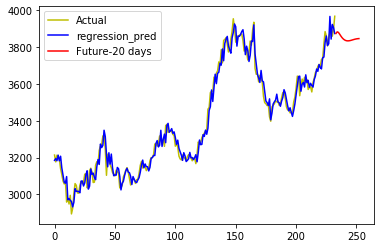

In [71]:
plt.plot(range(0,233),ans['actual_close'],'y',label='Actual')
plt.plot(range(0,233),ans['pred_close'],'blue',label='regression_pred')
#plt.plot(range(0,250),predictions,'orange',label='lstm_pred')
plt.plot(range(233,233+len(fut)),fut,'r',label=f'Future-{fut.shape[0]} days')
plt.legend()